# 1. Connection to Big Query

In [1]:
# Establish connection to BigQuery
from google.colab import auth
auth.authenticate_user()

print('Authenticated')

Authenticated


In [2]:
%load_ext google.colab.data_table

In [3]:
!gcloud config list

[component_manager]
disable_update_check = True
[core]
account = sudarshan.chikkathimmaiah@sjsu.edu

Your active configuration is: [default]


In [4]:
!gcloud config set project 'crashes-in-san-jose'

Updated property [core/project].


In [5]:
!gcloud config list project

[core]
project = crashes-in-san-jose

Your active configuration is: [default]


# 2. Load Dataset from Big Query

In [6]:
from google.cloud import bigquery

# dataset is created with project id: crashes-in-san-jose
project_id = 'crashes-in-san-jose'
client = bigquery.Client(project=project_id)

#Print your current data
# print the dataset id
for dataset in client.list_datasets():
  print(dataset.dataset_id)

SUD_1


In [7]:
# load the dataset from bigquery
query1 = """SELECT * FROM `crashes-in-san-jose.SUD_1.Crashes_locations`"""

In [8]:
dfquery = client.query(query1)

In [9]:
# store the dataset and print the few rows of data
df_natality=dfquery.to_dataframe()
df_natality.head(200)

,X,Y,DAYNUMBER,NARRATIVE,AGERANGE,CRASHNAME,LATITUDE,LONGITUDE,INTERSECTIONNUMBERINT,REPORTEDLOCATIONFOUND,...,DATEDIMID,HOUR,DAYOFWEEKNAME,MONTHNAME,YEAR,LASTUPDATE,NOTES,ENTERPRISEID,GlobalID,INJURYSEVERITY
0,6.135121e+06,1.929843e+06,28,23 year-old male driver vs 22 year-old male tr...,"16-29, 16-29",TAPSCR-95008,37.285709,-121.966229,1044,False,...,19820428,12,Wednesday,April,1982,2022-05-26 18:10:00+00:00,,DOT-VZCF-0000095008,{192040DB-DB5B-4C52-A718-0E0B4DFC490B},None
1,6.135159e+06,1.929282e+06,6,17 year-old female truck driver vs 21 year-old...,"16-29, 16-29",TAPSCR-12052,37.284172,-121.966070,1055,False,...,19771006,17,Thursday,October,1977,2022-05-26 18:04:50+00:00,,DOT-VZCF-0000012052,{0400B518-42B8-4041-84DC-14C4AE474631},Severe
2,6.135159e+06,1.929282e+06,21,20 year-old female driver vs 22 year-old male ...,"16-29, 16-29",TAPSCR-76013,37.284172,-121.966070,1055,False,...,19810321,2,Saturday,March,1981,2022-05-26 18:08:49+00:00,,DOT-VZCF-0000076013,{8CB19B30-8001-4DE0-ACCC-9DEEE236C99B},None
3,6.135159e+06,1.929282e+06,23,52 year-old male drunk driver vs 2 parked cars,50-64,CR-0000024624,37.284172,-121.966070,1055,False,...,20100623,0,Wednesday,June,2010,2022-05-26 19:18:33+00:00,,DOT-VZCF-0000553070,{F2EDF798-FAA0-414D-ABD6-8BF4991867E0},None
4,6.135101e+06,1.930220e+06,27,29 year-old female driver vs unspecified truck...,16-29,TAPSCR-386527,37.286744,-121.966319,1066,False,...,19990827,7,Friday,August,1999,2022-05-26 18:52:19+00:00,,DOT-VZCF-0000386527,{8D5D56A0-9359-48BE-A83E-5AF22BA7C6E2},None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6.185284e+06,1.939248e+06,10,22 year-old female driver vs 19 year-old male ...,"16-29, 16-29",TAPSCR-295305,37.313570,-121.794266,1231,False,...,19930610,14,Thursday,June,1993,2022-05-26 18:38:34+00:00,,DOT-VZCF-0000295305,{20DF008E-56DC-42D0-A078-DF2D32CE7C56},Minor
196,6.185284e+06,1.939248e+06,13,73 year-old female driver vs 21 year-old femal...,"65 plus, 16-29",TAPSCR-372455,37.313570,-121.794266,1231,False,...,19981013,16,Tuesday,October,1998,2022-05-26 18:51:23+00:00,,DOT-VZCF-0000372455,{A02B7F60-A219-4AC3-B7AD-171BADA864A4},None
197,6.185284e+06,1.939248e+06,7,Unspecified hit-and-run driver vs object,None,CR-0000011614,37.313570,-121.794266,1231,False,...,20090207,21,Saturday,February,2009,2022-05-26 19:19:50+00:00,,DOT-VZCF-0000573529,{967DC84C-F4EF-4CAA-94D4-FA42594A77CB},None
198,6.185284e+06,1.939248e+06,14,58 year-old female driver vs 37 year-old femal...,"50-64, 30-49",TAPSCR-357704,37.313570,-121.794266,1231,False,...,19971114,17,Friday,November,1997,2022-05-26 18:50:24+00:00,,DOT-VZCF-0000357704,{47AEA149-1721-44C5-BFBF-D357832FA19D},None


In [10]:
# fetch the dataset info
df = df_natality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598863 entries, 0 to 598862
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   X                                598863 non-null  float64            
 1   Y                                598863 non-null  float64            
 2   DAYNUMBER                        598863 non-null  Int64              
 3   NARRATIVE                        598842 non-null  object             
 4   AGERANGE                         541776 non-null  object             
 5   CRASHNAME                        598863 non-null  object             
 6   LATITUDE                         598863 non-null  float64            
 7   LONGITUDE                        598863 non-null  float64            
 8   INTERSECTIONNUMBERINT            598863 non-null  Int64              
 9   REPORTEDLOCATIONFOUND            598863 non-null  boolean  

# 3. Data Processing

In [11]:
# find the missing values from all the columns
missing_values = df.isnull().sum()
print(missing_values)

X                      0
Y                      0
DAYNUMBER              0
NARRATIVE             21
AGERANGE           57087
                   ...  
LASTUPDATE             0
NOTES               6728
ENTERPRISEID        2999
GlobalID               0
INJURYSEVERITY    422494
Length: 61, dtype: int64


In [12]:
df.columns

Index(['X', 'Y', 'DAYNUMBER', 'NARRATIVE', 'AGERANGE', 'CRASHNAME', 'LATITUDE',
       'LONGITUDE', 'INTERSECTIONNUMBERINT', 'REPORTEDLOCATIONFOUND',
       'SPEEDINGFLAG', 'HITANDRUNFLAG', 'OBJECTID', 'FACILITYID', 'INTID',
       'TCRNUMBER', 'CRASHDATETIME', 'CRASHDATETIMEUTC', 'VEHICLECOUNT',
       'VEHICLEPARTYCATEGORY', 'VEHICLEVIOLATIONCODEDESCRIPTION',
       'VEHICLEDAMAGE', 'VEHICLEDRIVERINTOXICATED', 'MINORINJURIES',
       'MODERATEINJURIES', 'SEVEREINJURIES', 'FATALINJURIES', 'CITYDAMAGEFLAG',
       'SHORTFORMFLAG', 'ROADWAYSURFACE', 'ROADWAYCONDITION', 'LIGHTING',
       'PRIMARYCOLLISIONFACTOR', 'WEATHER', 'COLLISIONTYPE',
       'VEHICLEINVOLVEDWITH', 'PEDESTRIANACTION', 'PEDESTRIANDIRECTIONFROM',
       'PEDESTRIANDIRECTIONTO', 'DISTANCE', 'DIRECTIONFROMINTERSECTION',
       'PROXIMITYTOINTERSECTION', 'TRAFFICCONTROL', 'INTASTREETNAME',
       'INTBSTREETNAME', 'INTASTREETTYPE', 'INTBSTREETTYPE',
       'INTERSECTIONTYPE', 'INTTRAFFICCONTROLTYPE', 'INTERSECTIONNUMBER

In [13]:
# retiaining the main features from the dataset
columns_to_keep = [
    "LATITUDE", "LONGITUDE", "INTERSECTIONNUMBERINT",
    "HOUR", "DAYOFWEEKNAME", "MONTHNAME", "YEAR", "DATEDIMID",
    "MINORINJURIES", "MODERATEINJURIES",
    "SEVEREINJURIES", "FATALINJURIES",
    "VEHICLECOUNT",
    "COLLISIONTYPE", "ROADWAYSURFACE", "ROADWAYCONDITION", "LIGHTING", "WEATHER", "TRAFFICCONTROL"
]

df = df[columns_to_keep]

In [14]:
df.isnull().sum()

,0
LATITUDE,0
LONGITUDE,0
INTERSECTIONNUMBERINT,0
HOUR,0
DAYOFWEEKNAME,0
MONTHNAME,0
YEAR,0
DATEDIMID,0
MINORINJURIES,0
MODERATEINJURIES,0


In [15]:
#Handling the missing values from the data
df['VEHICLECOUNT'].fillna(0, inplace=True)

<ipython-input-15-e567eed53502>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VEHICLECOUNT'].fillna(0, inplace=True)
<ipython-input-15-e567eed53502>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VEHICLECOUNT'].fillna(0, inplace=True)


In [16]:
import pandas as pd

# Convert 'DATEDIMID' to datetime format
df['DATEDIMID'] = pd.to_datetime(df['DATEDIMID'], format='%Y%m%d')
df['HOUR_BUCKET'] = pd.cut(df['HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

<ipython-input-16-c5dd6225e5b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATEDIMID'] = pd.to_datetime(df['DATEDIMID'], format='%Y%m%d')
<ipython-input-16-c5dd6225e5b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR_BUCKET'] = pd.cut(df['HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])


In [17]:
def categorize_severity(row):
    if row['FATALINJURIES'] > 0 or row['SEVEREINJURIES'] > 0:
        return 'High'
    elif row['MODERATEINJURIES'] > 0:
        return 'Medium'
    elif row['MINORINJURIES'] > 0:
        return 'Low'
    return 'Unknown'

df['SEVERITY_CATEGORY'] = df.apply(categorize_severity, axis=1)

<ipython-input-17-d4a5661a359a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEVERITY_CATEGORY'] = df.apply(categorize_severity, axis=1)


# 4. Exploratory Data Analysis

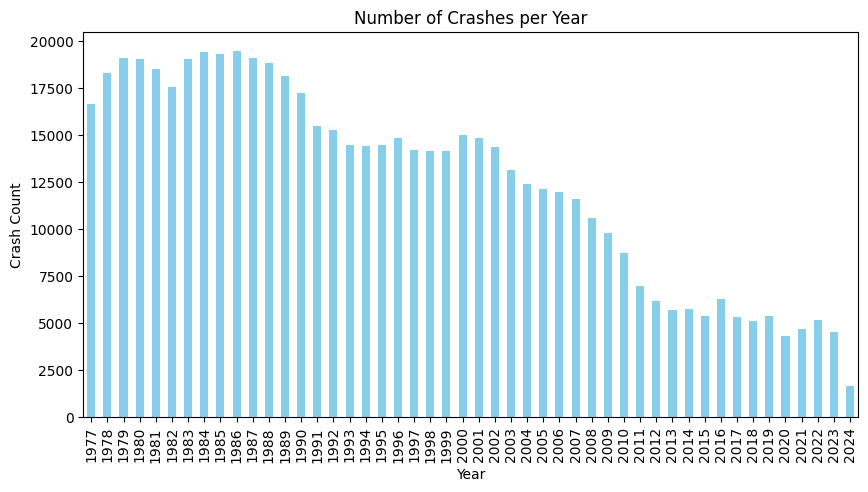

In [18]:
import matplotlib.pyplot as plt

# crashes over the time
df.groupby('YEAR').size().plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Number of Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Crash Count")
plt.show()

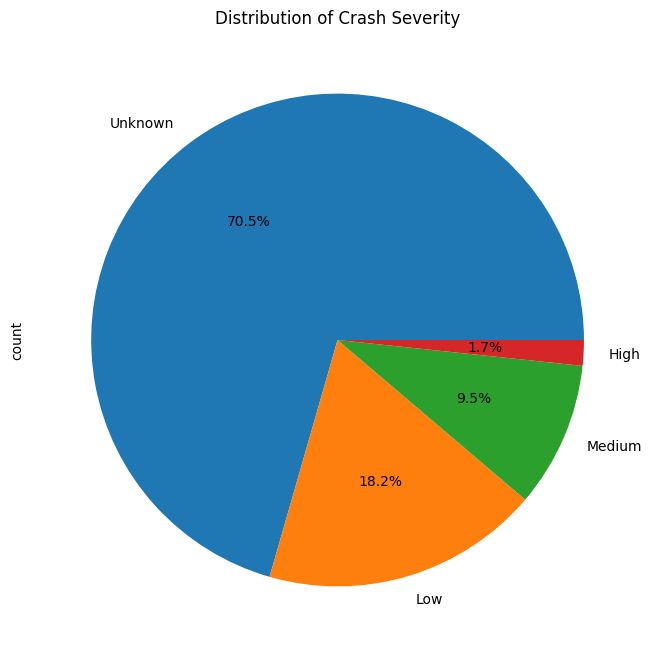

In [19]:
# Crashes Severity distribution
df['SEVERITY_CATEGORY'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Distribution of Crash Severity")
plt.show()

In [20]:
import folium
from folium.plugins import HeatMap

#HeatMap of crashes around San Jose over the year

# Create base map centered at San Jose
san_jose_map = folium.Map(location=[37.3382, -121.8863], zoom_start=12)

# Add heatmap layer
HeatMap(df[['LATITUDE', 'LONGITUDE']]).add_to(san_jose_map)

# Save & display map
san_jose_map.save("san_jose_crash_heatmap.html")
print("Heatmap saved!")

Heatmap saved!


<Axes: title={'center': 'Lighting vs Severity'}, xlabel='LIGHTING'>

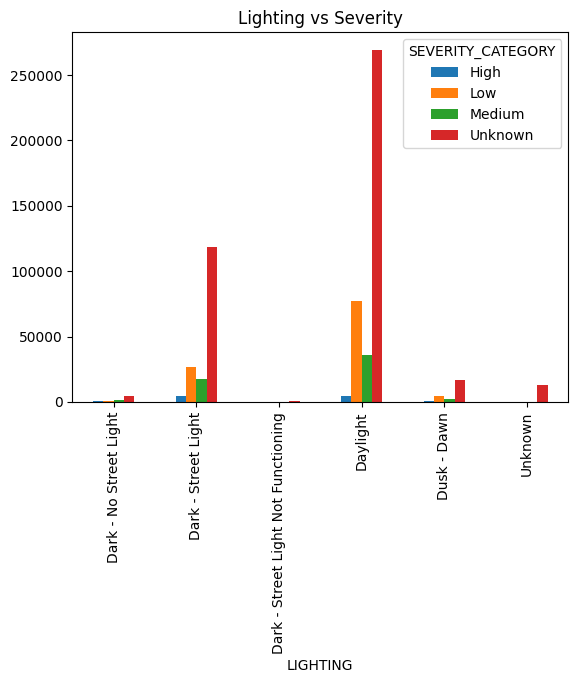

In [21]:
# Severity of the crash depending on the lighting around the place of crash
df.groupby(['LIGHTING', 'SEVERITY_CATEGORY']).size().unstack().plot(kind='bar', title="Lighting vs Severity")

# 5. Stored the processed data back to the Big Query

In [23]:
# Initialize BigQuery client with project ID
project_id = 'crashes-in-san-jose'
client = bigquery.Client(project=project_id)

# Define your dataset and table
dataset_id = "SUD_1"
table_id = "processed_data"
table_ref = f"{project_id}.{dataset_id}.{table_id}"

# Configure job settings
job_config = bigquery.LoadJobConfig(
    write_disposition=bigquery.WriteDisposition.WRITE_APPEND,
    autodetect=True
)

# Upload Pandas DataFrame to BigQuery
load_job = client.load_table_from_dataframe(df, table_ref, job_config=job_config)

# Wait for completion
load_job.result()
print("Upload complete! Data from df is now in BigQuery.")

Upload complete! Data from df is now in BigQuery.
